In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import listdir
from glob import glob
from PIL import Image
import os
import cv2
import scipy.ndimage as ndimage
from skimage import io

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.losses import binary_crossentropy
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import backend as K
from keras import activations
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


from numpy import expand_dims

In [3]:
from split_image import split_image
from patchify import patchify,unpatchify


In [4]:
model=load_model("../models/final_imbalance_best_sgd2.hdf5")

In [5]:
def load_data(files):
    X = []
    for file in files:
        img = load_img(file, target_size = (50,50))
        pix = img_to_array(img)
        pix /= 255
        X.append(pix)
    
    return np.stack(X)

In [37]:
img = Image.open("../data/testimages/cancerpatch.png")  # for example (3456, 5184, 3)
img = np.asarray(img)
img.shape

(50, 50, 3)

In [31]:

# read image
#img = cv2.imread('../data/testimages/normal.png')
img = Image.open("../data/testimages/cancerpatch.png")  # for example (3456, 5184, 3)
img = np.asarray(img)
if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]# create new image of desired size and color (blue) for padding
    
old_image_height, old_image_width, channels = img.shape
#if img.shape == (50,50,3)
new_image_height = img.shape[0]+50-img.shape[0]%50
new_image_width = img.shape[1]+50-img.shape[1]%50
color = (255,255,255)
print(new_image_height)
print(new_image_width)

result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[x_center:x_center+old_image_height, 
       y_center:y_center+old_image_width] = img



100
100


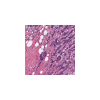

In [32]:
Image.fromarray(result)

In [33]:
result.shape

(100, 100, 3)

In [34]:
#image = Image.open("../data/testimages/normal.png")  # for example (3456, 5184, 3)
#image = np.asarray(image)

image_height, image_width, channel_count = result.shape
patch_height, patch_width, step = 50, 50, 50
patch_shape = (patch_height, patch_width, channel_count)

patches = patchify(result, patch_shape, step=step)
print(patches.shape)

(2, 2, 1, 50, 50, 3)


In [40]:
patches=img
patches.shape

(50, 50, 3)

In [39]:

output_patches = np.empty(patches.shape).astype(np.uint8)
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0]
       # saveimg = Image.fromarray(patch)
       # num = i * patches.shape[1] + j
       # saveimg.save(f"../data/testimages/patches/patch_{num}.png")
        print(patch.shape)
        x=tf.stack([patch],axis=0)
        print(patch.shape)
        print(x.shape)
        Y_pred = model.predict(x)
        y_pred = (Y_pred > 0.5).astype(np.int64)
        print("Prediction:",y_pred)

        if y_pred == 1:
            patch = np.full((50,50, 3), (0,0,255), dtype=np.uint8)  
            print("cancer")
            output_patches[i, j, 0] = patch
        else:
            output_patches[i, j, 0] = patch


()
()
(1,)


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/conv2d_8/Conv2D' defined at (most recent call last):
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-39-00145981f046>", line 12, in <module>
      Y_pred = model.predict(x)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/Users/phanisingaraju/opt/anaconda3/envs/breastcancer_env/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_2/conv2d_8/Conv2D'
input must be 4-dimensional[1]
	 [[{{node sequential_2/conv2d_8/Conv2D}}]] [Op:__inference_predict_function_344601]

In [20]:
output_patches.shape,x.shape

((2, 2, 1, 50, 50, 3), TensorShape([1, 50, 50, 3]))

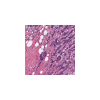

In [21]:
output_height = image_height - (image_height - patch_height) % step
output_width = image_width - (image_width - patch_width) % step
output_shape = (output_height, output_width, channel_count)
output_image = unpatchify(output_patches, output_shape)
Image.fromarray(output_image)

In [88]:
imagepatches = glob('../data/testimages/patches/*.png', recursive=True)
len(imagepatches)

108

In [89]:
imagepath=pd.DataFrame(imagepatches,columns=['path']) # taking path of the images in the dataframe
imagepath.head()

,path
0,../data/testimages/patches/patch_48.png
1,../data/testimages/patches/patch_74.png
2,../data/testimages/patches/patch_60.png
3,../data/testimages/patches/patch_61.png
4,../data/testimages/patches/patch_75.png


In [90]:
def load_data(files):
    X = []
    for file in files:
        img = load_img(file, target_size = (50,50))
        pix = img_to_array(img)
        pix /= 255
        X.append(pix)
    
    return np.stack(X)

In [91]:
X=load_data(imagepath.path) #Loading training images into numpy arrays
X.shape

(108, 50, 50, 3)

In [92]:
Y_pred = model.predict(X)
y_pred = (Y_pred > 0.5).astype(np.int64)


4/4 [==============================] - 0s 14ms/step


In [93]:
prediction_df=imagepath.filter(['path'],axis=1)
prediction_df['class']=y_pred
#print("Original data:",data.target.value_counts())
print("Predicted data:",prediction_df['class'].value_counts())

Predicted data: 0    106
1      2
Name: class, dtype: int64


In [114]:
output_height = image_height - (image_height - patch_height) % step
output_width = image_width - (image_width - patch_width) % step
output_shape = (output_height, output_width, channel_count)
output_image = unpatchify(output_patches, output_shape)
output_image = Image.fromarray(output_image)

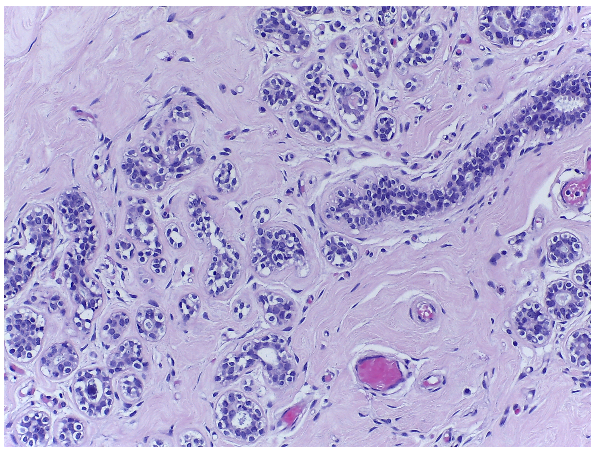

In [118]:
output_image

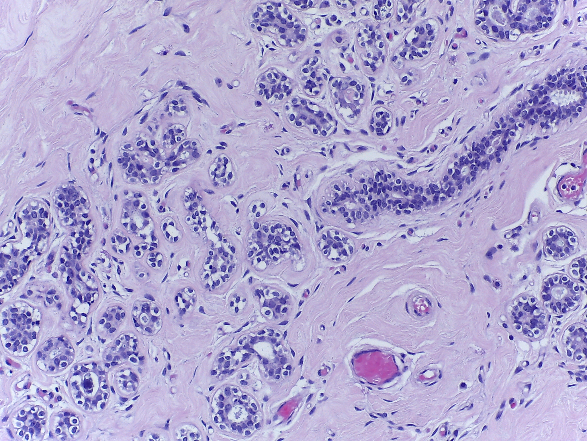

In [116]:
input_image = Image.open("../data/testimages/normal.png")  # for example (3456, 5184, 3)
input_image

In [94]:
prediction_df

,path,class
0,../data/testimages/patches/patch_48.png,0
1,../data/testimages/patches/patch_74.png,0
2,../data/testimages/patches/patch_60.png,0
3,../data/testimages/patches/patch_61.png,0
4,../data/testimages/patches/patch_75.png,0
...,...,...
103,../data/testimages/patches/patch_86.png,0
104,../data/testimages/patches/patch_92.png,0
105,../data/testimages/patches/patch_79.png,0
106,../data/testimages/patches/patch_45.png,0
